In [12]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import sys
sys.path.append('../utils')# Path to the directory containing all the period folders
sys.path.append('../data_func')
from data_helper_functions import create_study_periods_parallel
from config import config
results_dir_path = Path("../cir_results")

# # Initialize a dictionary to hold all the statistics
# all_stats = {
#     "mean_accuracy": [],
#     "high_confidence_long_accuracy": [],
#     "high_confidence_short_accuracy": [],
#     "top_k_long_accuracy": [],
#     "flop_k_short_accuracy": [],
#     "misclassification_rate_0": [],
#     "misclassification_rate_1": [],
#     "correlation_coefficient": [],
#     "dates": []
# }

# # Loop through each period folder and read the model_stats.json file
# for period_folder in sorted(results_dir_path.iterdir()):
#     if period_folder.is_dir():
#         # Construct the full path to the model_stats.json file
#         stats_file = period_folder / 'model_stats.json'
        
#         # Check if the file exists
#         if stats_file.exists():
#             # Read the JSON file
#             with open(stats_file, 'r') as f:
#                 stats = json.load(f)
            
#             # Extract the date from the folder name
#             date_str = period_folder.name.split('_')[-1]
#             all_stats['dates'].append(pd.to_datetime(date_str))

#             # Append the statistics to the respective lists in the all_stats dictionary
#             all_stats['mean_accuracy'].append(stats.get("mean_accuracy", float('nan')))
#             all_stats['high_confidence_long_accuracy'].append(stats['portfolio_accuracies']["high_confidence_long_accuracy"].get('10', float('nan')))
#             all_stats['high_confidence_short_accuracy'].append(stats['portfolio_accuracies']["high_confidence_short_accuracy"].get('10', float('nan')))
#             all_stats['top_k_long_accuracy'].append(stats['portfolio_accuracies']["top_k_long_accuracy"].get('10', float('nan')))
#             all_stats['flop_k_short_accuracy'].append(stats['portfolio_accuracies']["flop_k_short_accuracy"].get('10', float('nan')))
#             # all_stats['correlation_coefficient'].append(stats.get("correlation_coefficient", float('nan')))

# # Convert the dictionary to a DataFrame
# df_stats = pd.DataFrame.from_dict(all_stats)

# # Drop rows where any of the data is missing
# df_stats.dropna(inplace=True)

# # Sort the DataFrame based on dates to ensure chronological plotting
# df_stats.sort_values('dates', inplace=True)

# # Plot model accuracy over time
# plt.figure(figsize=(10, 5))
# plt.plot(df_stats['dates'], df_stats['high_confidence_short_accuracy'], marker='o')
# plt.plot(df_stats['dates'], df_stats['flop_k_short_accuracy'], marker='.')
# plt.title('Model Mean Accuracy Over Time')
# plt.xlabel('Date')
# plt.ylabel('Mean Accuracy')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.grid(True)
# plt.savefig('model_accuracy_over_time.png')
# plt.show()

# # Calculate and display the average of each statistic
# average_stats = df_stats.mean()
# print("Average Statistics:")
# print(average_stats)

In [13]:
def load_data(path,  start):
    # Check the file extension to decide the reading method
    if path.endswith('.parquet'):
        df = pd.read_parquet(path)
    elif path.endswith('.csv'):
        df = pd.read_csv(path)
    else:
        raise ValueError("Unsupported file format")

    # Proceed with your data processing...
    df['date'] = pd.to_datetime(df['date'])
    # Filter based on the start date and features...
    df = df[df['date'] >= start]

    # Assuming start_date and end_date are defined somewhere...
    start_date = df['date'].min()
    end_date = df['date'].max()

    return df, start_date, end_date

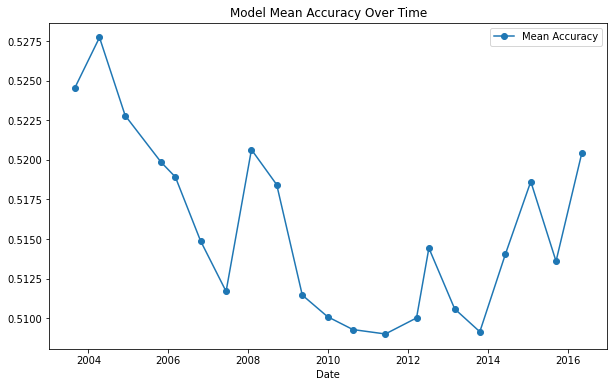

Average Statistics:
mean_accuracy                                           0.515719
overall_correlation_reservation                              NaN
overall_correlation_score                                    NaN
high_confidence_long_accuracy                           0.590952
high_confidence_short_accuracy                          0.589304
top_k_long_accuracy                                     0.592161
flop_k_short_accuracy                                   0.587399
misclassification_rate_0                                0.468456
misclassification_rate_1                                0.500058
dates                              2010-01-11 20:34:17.142857216
dtype: object


In [6]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Define the path to the directory containing results
results_dir_path = Path("../cir_results")

# Initialize a dictionary to store all the collected statistics
all_stats = {
    "mean_accuracy": [],
    "overall_correlation_reservation": [],
    "overall_correlation_score": [],
    "high_confidence_long_accuracy": [],
    "high_confidence_short_accuracy": [],
    "top_k_long_accuracy": [],
    "flop_k_short_accuracy": [],
    "misclassification_rate_0": [],
    "misclassification_rate_1": [],
    "dates": []
}

# Iterate through each folder in the results directory
for period_folder in sorted(results_dir_path.iterdir()):
    if period_folder.is_dir():
        stats_file = period_folder / 'model_stats.json'
        if stats_file.exists():
            with open(stats_file, 'r') as f:
                stats = json.load(f)
            
            # Extract the date from the folder name
            date_str = period_folder.name.split('_')[-1]
            all_stats['dates'].append(pd.to_datetime(date_str))
            
            # Extract individual statistics from the JSON data
            all_stats['mean_accuracy'].append(stats.get("mean_accuracy", float('nan')))
            all_stats['overall_correlation_reservation'].append(stats.get("overall_correlation_reservation", float('nan')))
            all_stats['overall_correlation_score'].append(stats.get("overall_correlation_score", float('nan')))
            
            # Append portfolio accuracies
            pa = stats.get("portfolio_accuracies", {})
            all_stats['high_confidence_long_accuracy'].append(pa.get("high_confidence_long_accuracy", {}).get('10', float('nan')))
            all_stats['high_confidence_short_accuracy'].append(pa.get("high_confidence_short_accuracy", {}).get('10', float('nan')))
            all_stats['top_k_long_accuracy'].append(pa.get("top_k_long_accuracy", {}).get('10', float('nan')))
            all_stats['flop_k_short_accuracy'].append(pa.get("flop_k_short_accuracy", {}).get('10', float('nan')))
            
            # Misclassification rates
            mr = stats.get("misclassification_rates", {})
            all_stats['misclassification_rate_0'].append(mr.get("0", float('nan')))
            all_stats['misclassification_rate_1'].append(mr.get("1", float('nan')))

# Convert the dictionary to a DataFrame for further analysis
df_stats = pd.DataFrame.from_dict(all_stats)
df_stats['dates'] = pd.to_datetime(df_stats['dates'])
df_stats.sort_values('dates', inplace=True)

# Plotting mean accuracy over time
if not df_stats.empty:
    dates = df_stats['dates'].to_numpy()
    high_confidence_accuracy = df_stats['high_confidence_long_accuracy'].to_numpy()
    
    plt.figure(figsize=(10, 6))
    plt.plot(dates, mean_accuracy, marker='o', label='Mean Accuracy')
    # Add similar lines for other columns you want to plot (using their NumPy arrays)
    plt.title('Model Mean Accuracy Over Time')
    plt.xlabel('Date')
    plt.legend()
    plt.show()

    # Calculate and print the average of each statistic
    average_stats = df_stats.mean(skipna=True)  # Skip NaN values in mean calculation
    print("Average Statistics:")
    print(average_stats)
else:
    print("No data available to plot.")





In [3]:
df_stats

mean_accuracy  overall_correlation_reservation  overall_correlation_score  \
0        0.524503                              NaN                        NaN   
1        0.527721                              NaN                        NaN   
2        0.522792                              NaN                        NaN   
3        0.519850                              NaN                        NaN   
4        0.518912                              NaN                        NaN   
5        0.514886                              NaN                        NaN   
6        0.511688                              NaN                        NaN   
7        0.520639                              NaN                        NaN   
8        0.518426                              NaN                        NaN   
9        0.511456                              NaN                        NaN   
10       0.510092                              NaN                        NaN   
11       0.509279                              NaN                        NaN   
12       0.509001                              NaN                        NaN   
13       0.510014                              NaN                        NaN   
14       0.514424                              NaN                        NaN   
15       0.510584                              NaN                        NaN   
16       0.509141                              NaN                        NaN   
17       0.514043                              NaN                        NaN   
18       0.518624                              NaN                        NaN   
19       0.513593                              NaN                        NaN   
20       0.520428                              NaN                        NaN   

    high_confidence_long_accuracy  high_confidence_short_accuracy  \
0                        0.640000                        0.616923   
1                        0.630000                        0.623077   
2                        0.583077                        0.581538   
3                        0.595385                        0.590769   
4                        0.581538                        0.549231   
5                        0.588462                        0.586154   
6                        0.610000                        0.567692   
7                        0.590769                        0.637692   
8                        0.609231                        0.614615   
9                        0.612308                        0.622308   
10                       0.579231                        0.586923   
11                       0.573846                        0.568462   
12                       0.554615                        0.578462   
13                       0.586923                        0.572308   
14                       0.566154                        0.579231   
15                       0.568462                        0.554615   
16                       0.577692                        0.573077   
17                       0.572308                        0.590769   
18                       0.603077                        0.573846   
19                       0.598462                        0.593077   
20                       0.588462                        0.614615   

    top_k_long_accuracy  flop_k_short_accuracy  misclassification_rate_0  \
0              0.639231               0.612308                  0.371604   
1              0.625385               0.610000                  0.399235   
2              0.603846               0.593077                  0.423142   
3              0.583077               0.600000                  0.425802   
4              0.580000               0.555385                  0.442756   
5              0.590769               0.579231                  0.434726   
6              0.612308               0.572308                  0.501140   
7              0.581538               0.638462                  0.440529   
8              0.6

In [ ]:
import torch
loaded_data = torch.load('../data/train_test_splits')
train_test_splits = loaded_data['train_test_splits']


AttributeError: 'list' object has no attribute 'shape'

In [4]:
len(train_test_splits)

21

In [5]:
train_test_splits

[{'train': (tensor([[[ 2.7613e-02, -3.0676e+00, -1.2287e-01,  1.8881e+00, -1.0788e-01],
            [ 2.7626e-02, -1.9429e-01, -5.3223e+00,  1.8188e+00, -1.6631e-01],
            [ 2.7622e-02, -6.2935e-01, -2.2784e-01,  1.8509e+00, -2.1474e-01],
            ...,
            [ 2.7908e-02,  4.3034e-01,  8.0592e-01,  2.1256e+00, -5.5244e-01],
            [ 2.7885e-02, -1.2352e-01,  3.7215e-01,  2.0670e+00, -5.4963e-01],
            [ 2.7885e-02, -1.2352e-01,  3.5157e-01,  2.0230e+00, -5.6087e-01]],
   
           [[ 2.7626e-02, -1.9429e-01, -5.3223e+00,  1.8188e+00, -1.6631e-01],
            [ 2.7622e-02, -6.2935e-01, -2.2784e-01,  1.8509e+00, -2.1474e-01],
            [ 2.7621e-02, -1.2607e+00, -2.4510e+00,  2.0360e+00, -2.6284e-01],
            ...,
            [ 2.7885e-02, -1.2352e-01,  3.7215e-01,  2.0670e+00, -5.4963e-01],
            [ 2.7885e-02, -1.2352e-01,  3.5157e-01,  2.0230e+00, -5.6087e-01],
            [ 2.7885e-02, -1.2352e-01, -3.0124e-01,  1.9763e+00, -5.8053e-01]],
   

In [11]:
def calculate_rolling_windows(train_test_splits, window_size):
    total_train_windows = 0
    total_val_windows = 0
    total_test_windows = 0

    for split in train_test_splits:
        train_data = split['train'][0]
        val_data = split['val'][0]
        test_data = split['test'][0]

        train_length = len(train_data)
        val_length = len(val_data)
        test_length = len(test_data)

        total_train_windows += train_length - window_size + 1
        total_val_windows += val_length - window_size + 1 
        total_test_windows += test_length - window_size + 1

    total_windows = total_train_windows + total_val_windows + total_test_windows

    return total_windows, total_train_windows, total_val_windows, total_test_windows


window_size = 30  # Specify your rolling window size here

total_windows, total_train_windows, total_val_windows, total_test_windows = calculate_rolling_windows(train_test_splits, window_size)
print("Total rolling windows:", total_windows)
print("Total train rolling windows:", total_train_windows)
print("Total validation rolling windows:", total_val_windows)
print("Total test rolling windows:", total_test_windows)

Total rolling windows: 18682248
Total train rolling windows: 15823661
Total validation rolling windows: 198757
Total test rolling windows: 2659830


In [3]:
path=config['data_path']
df, start_date, end_date = load_data(f'../{path}', config['start_date'])
start_date=df['date'].min()
end_date=df['date'].max()
# df=df.reset_index()
# df=df.drop(['level_0'],axis=1)
if len(config['tickers'])!=0:
    df = df[df['TICKER'].isin(config['tickers'])]
if len(config['features'])==0:
    config['features']=[col for col in df.columns if col.startswith('emb')]
    # config['features']=[col for col in df.columns if col not in ['date', 'TICKER','PERMNO',"PRC",	"VOL",		"NUMTRD",	"MktCap"]]
    config['features'].append('RET')
    # config['features'] = [col for col in df.columns if col not in ['date', 'TICKER',"PERMNO"]]
    # config['features']=[col for col in df.columns if col.startswith('alpha')]
    for col in df.columns:
        if df[col].dtype == bool:
            df[col] = df[col].astype(int)
# df = df.rename(columns={'S_DQ_PCTCHANGE': 'RET'})
if 'RET' not in config['features']:
    config['features'].append('RET')
df = df[['date', 'TICKER','volatility_decile'] + config['features']]
df=df.dropna()

In [4]:
df

date TICKER  volatility_decile           PVT         RSI  \
3917956  2000-03-01     BF                1.0 -5.871794e+02  100.000000   
8352921  2000-03-01    VIA                5.0  4.292002e+04  100.000000   
8352920  2000-03-01    VIA                5.0  7.482043e+04  100.000000   
3529510  2000-03-01    RTN                8.0  1.261774e+04    0.000000   
3529511  2000-03-01    RTN                8.0  2.200275e+04    0.000000   
...             ...    ...                ...           ...         ...   
3875905  2016-12-30    ARW                2.0 -8.579746e+05   45.295755   
18050891 2016-12-30    BLK                2.0  2.856773e+06   40.276849   
3896032  2016-12-30    BCE                1.0 -6.070329e+06   52.965062   
17990994 2016-12-30    MFC                5.0 -2.732609e+06   39.694988   
27309775 2016-12-30   TSLA                5.0  2.427768e+07   65.279774   

                MACD       VWAP       ATR       RET  
3917956  -119.034086  66.781499  0.843021 -0.011811  
8352921   -30.378613  69.893897  0.683157  0.012332  
8352920    -9.990362  70.114601  0.672264  0.012332  
3529510    -1.442885  69.518493  0.227321  0.010135  
3529511     2.302965  69.765300  0.212500  0.010135  
...              ...        ...       ...       ...  
3875905    -7.293715  40.690216  1.114693 -0.011918  
18050891   19.657038  40.690226  6.052714  0.004063  
3896032    13.641166  40.690227  0.464107  0.001158  
17990994    6.744614  40.690224  0.293007  0.002814  
27309775   16.889428  40.690274  5.480538 -0.004611  

[4262529 rows x 9 columns]

In [11]:

study_periods = create_study_periods_parallel(
            df,
            train_size=800,
            val_size=40,
            trade_size=160,
            start_date=start_date,
            end_date=end_date,
            target_type=config['target'],
            standardize=True,
            data_type=config['data_type'],
    features=config['features'],use_autoencoder=False
        
        )

NameError: name 'mcal' is not defined

In [18]:
study_periods[i][2]

date TICKER  volatility_decile       PVT       RSI      MACD  \
17424465 2004-02-25    JEF                4.0  0.176077 -0.302816  0.020088   
3262524  2004-02-25    JNJ                1.0 -0.144541  0.237048  0.015616   
6041624  2004-02-25   SAFC                1.0  0.353100  0.164527  0.010356   
8800244  2004-02-25   ZBRA                2.0  0.161925 -0.104032  0.009713   
3912220  2004-02-25     BF                0.0  0.192796 -0.096728  0.006490   
...             ...    ...                ...       ...       ...       ...   
7016295  2004-10-12    STZ                3.0  0.133209 -0.363833 -0.036336   
9617652  2004-10-12   BBBY                4.0  1.316484  0.868641 -0.034310   
464733   2004-10-12   CMVT                5.0 -3.581108  0.618692 -0.035672   
19302552 2004-10-12   ENDP                5.0  0.330183 -0.765445 -0.036607   
17424624 2004-10-12    JEF                3.0  0.175387  0.338305 -0.034015   

              VWAP       ATR       RET  target  
17424465 -1.153145 -0.049005  0.240680       1  
3262524  -1.153136 -0.053797 -0.077107       0  
6041624  -1.153136 -0.051992  0.211980       1  
8800244  -1.153135 -0.020287  1.733521       1  
3912220  -1.153135 -0.056475 -0.044069       0  
...            ...       ...       ...     ...  
7016295  -1.202769 -0.053913 -0.164685       0  
9617652  -1.202768 -0.051035  0.043284       1  
464733   -1.202769 -0.052919 -0.173138       0  
19302552 -1.202771 -0.054620 -0.477201       0  
17424624 -1.202771 -0.052891  0.450545       1  

[160817 rows x 10 columns]

In [37]:
import pandas as pd
import quantstats as qs

# Assuming study_periods is structured correctly and populated
portfolio_daily_returns = pd.Series()

for period in study_periods:
    test_set = period[2]  # The DataFrame of the test set
    if test_set is not None:
        # Calculate equally weighted daily returns by averaging the 'RET' column
        daily_returns = test_set.groupby('date')['RET'].mean()
        # Convert daily_returns to a Series with the date as the index
        daily_returns = pd.Series(daily_returns, index=pd.to_datetime(daily_returns.index))
        # Concatenate to the main Series
        portfolio_daily_returns = pd.concat([portfolio_daily_returns, daily_returns])

# Ensure the index is a datetime index (important for time series analysis)
portfolio_daily_returns.index = pd.to_datetime(portfolio_daily_returns.index)

# Sort the index just in case it's not in order
portfolio_daily_returns = portfolio_daily_returns.sort_index()


# # Convert DataFrame to Series (if necessary)
# portfolio_daily_returns = portfolio_daily_returns.squeeze()
# Convert Series to DataFrame
portfolio_daily_returns_df = portfolio_daily_returns.to_frame(name='returns')

# Ensure the DataFrame has a datetime index and no additional level issues
portfolio_daily_returns_df.index = pd.to_datetime(portfolio_daily_returns_df.index)

# Attempt to create


/var/folders/bm/bm_nkxfx3w1303dr6gyz9cg00000gn/T/ipykernel_50455/1577434172.py:15: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  portfolio_daily_returns = pd.concat([portfolio_daily_returns, daily_returns])


In [38]:
# # Extend pandas functionality with QuantStats
# qs.extend_pandas()

# # Display some basic plots and generate reports
# # qs.plots.snapshot(portfolio_daily_returns, title='Portfolio Performance Snapshot')
# qs.reports.full(portfolio_daily_returns)
# qs.reports.html(portfolio_daily_returns, output='long_universe.html')  # Saves the report to an HTML file
import pyfolio as pf

# Create a full tear sheet for the portfolio daily returns
pf.create_full_tear_sheet(portfolio_daily_returns_df['returns'])


/Users/jacobbarcelona/.pyenv/versions/3.9.16/lib/python3.9/site-packages/empyrical/stats.py:1494: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


AttributeError: 'Series' object has no attribute 'iteritems'

In [1]:
import pandas as pd
import pyfolio as pf
print("Pandas version:", pd.__version__)
print("Pyfolio version:", pf.__version__)

ModuleNotFoundError: No module named 'pyfolio'